<a href="https://colab.research.google.com/github/haramirezr/alura-store-analisis-challengue/blob/main/cuaderno_del_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **alura-store-analisis-challengue**

## Inicio

### Carga de la Data

In [3]:
import pandas as pd

base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam"

urls = {
    "tienda_1": f"/content/drive/MyDrive/Colab Notebooks/pandas/challengue/tienda_1.csv",
    "tienda_2": f"/content/drive/MyDrive/Colab Notebooks/pandas/challengue/tienda_2.csv",
    "tienda_3": f"/content/drive/MyDrive/Colab Notebooks/pandas/challengue/tienda_3.csv",
    "tienda_4": f"/content/drive/MyDrive/Colab Notebooks/pandas/challengue/tienda_4.csv",
}

def leer_csv_inteligente(url):
    # intenta con los separadores más comunes
    for sep in [',', ';']:
        try:
            df = pd.read_csv(url, sep=sep, encoding='utf-8')
            return df
        except Exception:
            continue
    # último intento flexible
    return pd.read_csv(url, sep=None, engine='python')

tienda1 = leer_csv_inteligente(urls["tienda_1"])
tienda2 = leer_csv_inteligente(urls["tienda_2"])
tienda3 = leer_csv_inteligente(urls["tienda_3"])
tienda4 = leer_csv_inteligente(urls["tienda_4"])

tienda1.head()


Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

### Exploración Inicial

Tamaño del dataset: (2359, 12)

Columnas disponibles:
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

--- Info general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   in

count unique                 top  freq  \
Producto                  2359     51          Microondas    60   
Categoría del Producto    2359      8             Muebles   465   
Precio                  2359.0    NaN                 NaN   NaN   
Costo de envío          2359.0    NaN                 NaN   NaN   
Fecha de Compra           2359   1018          15/05/2021     7   
Vendedor                  2359     14     Izabela de León   197   
Lugar de Compra           2359     19              Bogotá   984   
Calificación            2359.0    NaN                 NaN   NaN   
Método de pago            2359      4  Tarjeta de crédito  1704   
Cantidad de cuotas      2359.0    NaN                 NaN   NaN   
lat                     2359.0    NaN                 NaN   NaN   
lon                     2359.0    NaN                 NaN   NaN   

                                 mean            std       min       25%  \
Producto                          NaN            NaN       NaN       NaN   
Categoría del Producto            NaN            NaN       NaN       NaN   
Precio                  487867.910131  614686.765387    7600.0   55750.0   
Costo de envío            26018.60958   32860.001783       0.0    3100.0   
Fecha de Compra                   NaN            NaN       NaN       NaN   
Vendedor                          NaN            NaN       NaN       NaN   
Lugar de Compra                   NaN            NaN       NaN       NaN   
Calificación                 3.976685        1.41537       1.0       3.0   
Método de pago                    NaN            NaN       NaN       NaN   
Cantidad de cuotas           2.943196       2.819897       1.0       1.0   
lat                          5.365283       2.287445  -4.21528   4.60971   
lon                        -74.789417       1.217827 -77.28111 -75.56359   

                             50%       75%        max  
Producto                     NaN       NaN        NaN  
Categoría del Producto       NaN       NaN        NaN  
Precio                  235300.0  678100.0  2977000.0  
Costo de envío           12400.0   36000.0   160800.0  
Fecha de Compra              NaN       NaN        NaN  
Vendedor                     NaN       NaN        NaN  
Lugar de Compra              NaN       NaN        NaN  
Calificación                 5.0       5.0        5.0  
Método de pago               NaN       NaN        NaN  
Cantidad de cuotas           1.0       4.0       24.0  
lat                      4.60971   6.25184   11.54444  
lon                    -74.19904 -74.08175   -67.9239

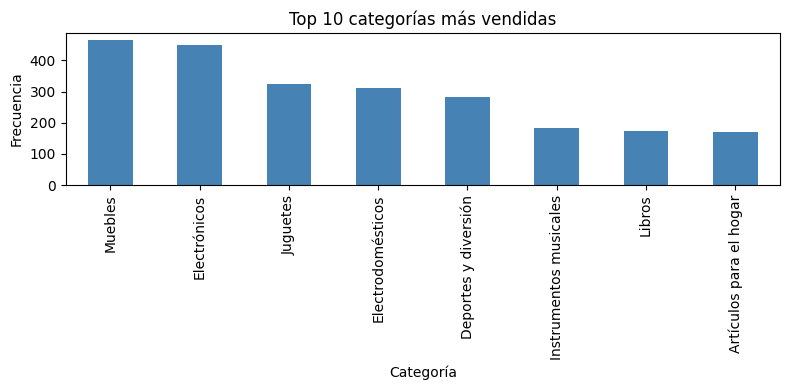

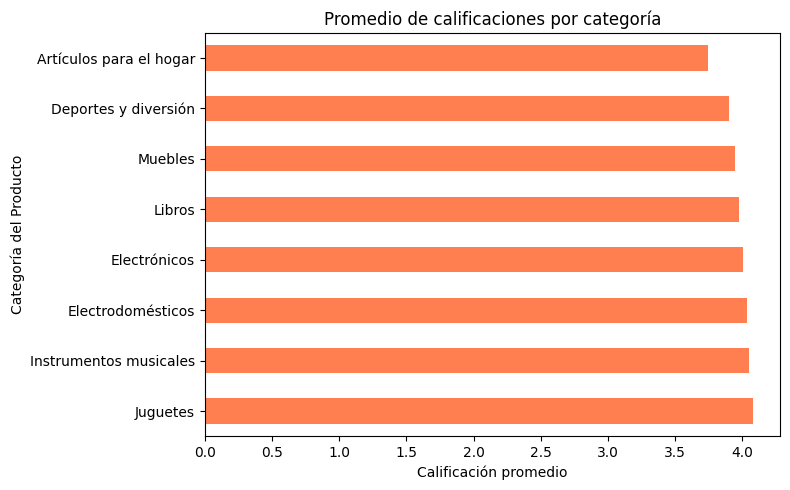

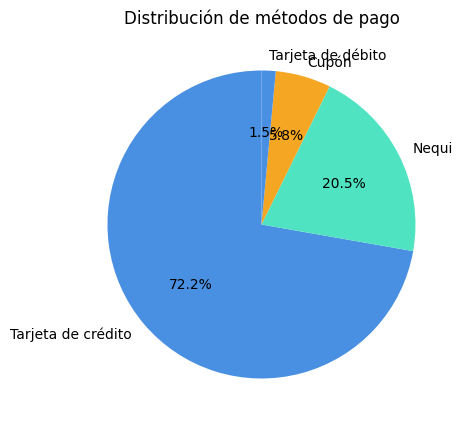


Rango de latitudes: -4.21528 → 11.54444
Rango de longitudes: -77.28111 → -67.9239


In [4]:
# ============================
# EXPLORACIÓN INICIAL DE DATOS
# ============================

df = tienda1.copy()  # ejemplo con tienda1 (luego el comparativo global)

print("Tamaño del dataset:", df.shape)
print("\nColumnas disponibles:")
print(df.columns.tolist())

# Tipos de datos y nulos
print("\n--- Info general ---")
df.info()

print("\n--- Valores faltantes ---")
print(df.isna().sum())

# Estadísticas numéricas
print("\n--- Resumen estadístico ---")
display(df.describe(include='all').T)

# Distribución de categorías principales
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Categoría del Producto'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 categorías más vendidas")
plt.xlabel("Categoría"); plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Calificaciones promedio por categoría
df.groupby('Categoría del Producto')['Calificación'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(8,5), color='coral')
plt.title("Promedio de calificaciones por categoría")
plt.xlabel("Calificación promedio")
plt.tight_layout()
plt.show()

# Tipos de pago más comunes
df['Método de pago'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), startangle=90, colors=['#4a90e2','#50e3c2','#f5a623'])
plt.title("Distribución de métodos de pago")
plt.ylabel("")
plt.show()

# Detección rápida de coordenadas fuera de rango
if {'lat','lon'}.issubset(df.columns):
    print("\nRango de latitudes:", df['lat'].min(), "→", df['lat'].max())
    print("Rango de longitudes:", df['lon'].min(), "→", df['lon'].max())


## Análisis

### Primer Análisis (ingresos)

En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

Tienda 1: columnas -> ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra'] ...
Tienda 2: columnas -> ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra'] ...
Tienda 3: columnas -> ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra'] ...
Tienda 4: columnas -> ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra'] ...


Tienda   Ingreso Total
0  Tienda 1  $1,150,880,400
1  Tienda 2  $1,116,343,500
2  Tienda 3  $1,098,019,600
3  Tienda 4  $1,038,375,700

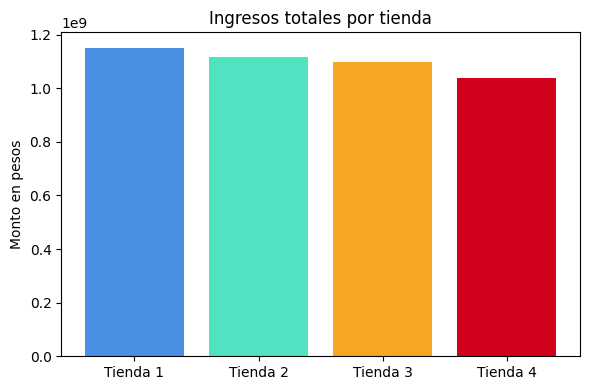

In [5]:
# ===============================
# INGRESO TOTAL POR CADA TIENDA
# ===============================

# Verificamos nombres coherentes de las columnas (por si hay diferencias)
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i}: columnas ->", df.columns.tolist()[:5], "...")

# Cálculo del ingreso total
ingresos = {
    "Tienda 1": tienda1["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

# Mostramos resultados con formato legible
import pandas as pd

df_ingresos = pd.DataFrame(list(ingresos.items()), columns=["Tienda", "Ingreso Total"])
df_ingresos["Ingreso Total"] = df_ingresos["Ingreso Total"].map("${:,.0f}".format)

display(df_ingresos)

# Visualización comparativa
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(df_ingresos["Tienda"],
        [float(x.replace("$","").replace(",","")) for x in df_ingresos["Ingreso Total"]],
        color=["#4a90e2", "#50e3c2", "#f5a623", "#d0021b"])
plt.title("Ingresos totales por tienda")
plt.ylabel("Monto en pesos")
plt.tight_layout()
plt.show()


### Segundo Análisis (ventas)

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.


🔹 Tienda 1 – Top 5 categorías más vendidas:


Ventas
Categoría del Producto        
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284

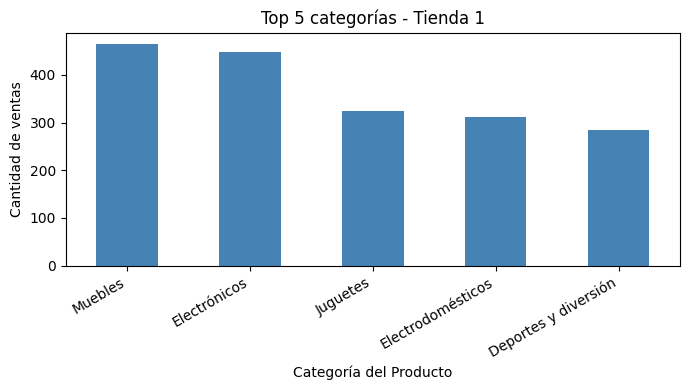


🔹 Tienda 2 – Top 5 categorías más vendidas:


Ventas
Categoría del Producto        
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275

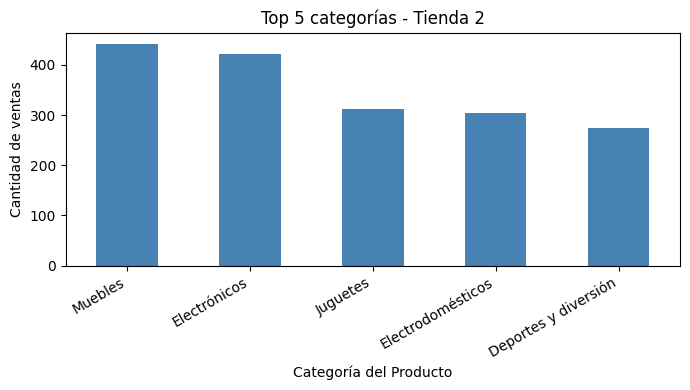


🔹 Tienda 3 – Top 5 categorías más vendidas:


Ventas
Categoría del Producto        
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277

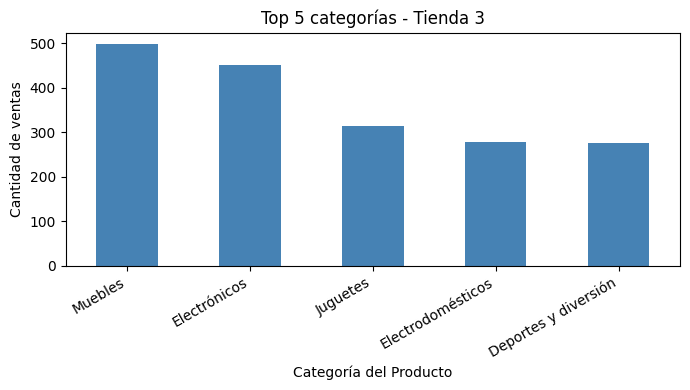


🔹 Tienda 4 – Top 5 categorías más vendidas:


Ventas
Categoría del Producto        
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254

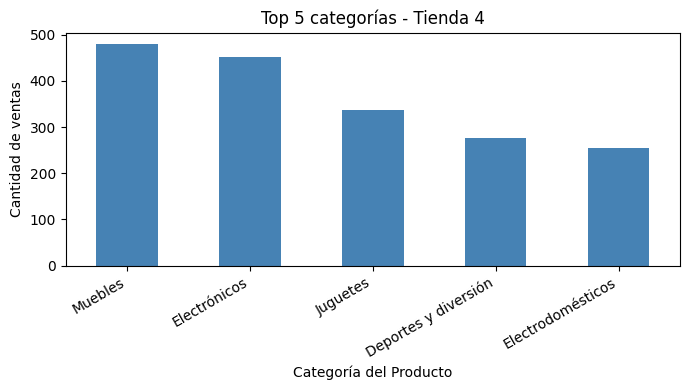

In [6]:
# =========================================
# CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA
# =========================================

import pandas as pd
import matplotlib.pyplot as plt

# Función auxiliar para agrupar y graficar top categorías
def top_categorias(df, nombre_tienda, top_n=5):
    categorias = df["Categoría del Producto"].value_counts().head(top_n)
    print(f"\n🔹 {nombre_tienda} – Top {top_n} categorías más vendidas:")
    display(categorias.to_frame("Ventas"))

    # gráfico
    plt.figure(figsize=(7,4))
    categorias.plot(kind='bar', color='steelblue')
    plt.title(f"Top {top_n} categorías - {nombre_tienda}")
    plt.xlabel("Categoría del Producto")
    plt.ylabel("Cantidad de ventas")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

# Aplicamos la función a cada tienda
top_categorias(tienda1, "Tienda 1")
top_categorias(tienda2, "Tienda 2")
top_categorias(tienda3, "Tienda 3")
top_categorias(tienda4, "Tienda 4")


### Tercer Análisis (Valoración media por tienda)

Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00

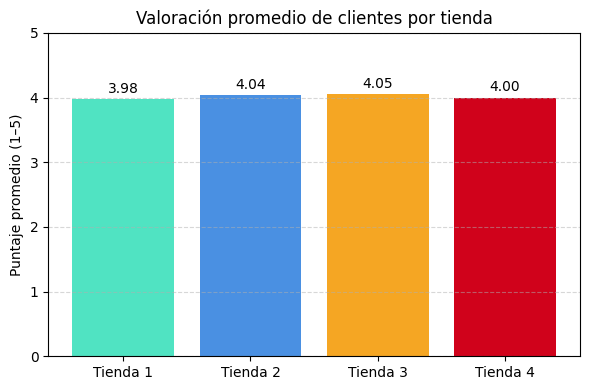

In [7]:
# =====================================
# VALORACIÓN MEDIA (CALIFICACIÓN PROMEDIO)
# =====================================

import pandas as pd
import matplotlib.pyplot as plt

# Calcular la calificación promedio de cada tienda
valores_promedio = {
    "Tienda 1": tienda1["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean(),
}

# Convertir a DataFrame para visualización ordenada
df_valoraciones = pd.DataFrame(list(valores_promedio.items()), columns=["Tienda", "Calificación Promedio"])
df_valoraciones["Calificación Promedio"] = df_valoraciones["Calificación Promedio"].round(2)

display(df_valoraciones)

# Gráfico comparativo
plt.figure(figsize=(6,4))
bars = plt.bar(df_valoraciones["Tienda"], df_valoraciones["Calificación Promedio"], color=["#50e3c2","#4a90e2","#f5a623","#d0021b"])
plt.title("Valoración promedio de clientes por tienda")
plt.ylim(0,5)
plt.ylabel("Puntaje promedio (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar etiquetas sobre cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Cuarto Análisis (Productos más vendidos y menos vendidos)


🔹 Tienda 1 – 5 productos más vendidos:


Ventas
Producto                
Microondas            60
TV LED UHD 4K         60
Armario               60
Secadora de ropa      58
Mesa de noche         56


🔹 Tienda 1 – 5 productos menos vendidos:


Ventas
Producto                           
Ciencia de datos con Python      39
Pandereta                        36
Olla de presión                  35
Auriculares con micrófono        33
Celular ABXY                     33

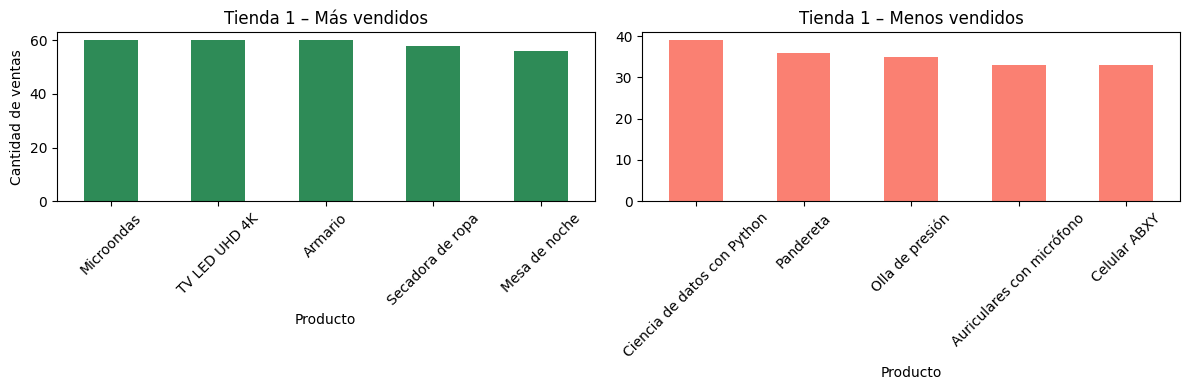


🔹 Tienda 2 – 5 productos más vendidos:


Ventas
Producto                         
Iniciando en programación      65
Microondas                     62
Batería                        61
Guitarra acústica              58
Pandereta                      58


🔹 Tienda 2 – 5 productos menos vendidos:


Ventas
Producto               
Auriculares          37
Sillón               35
Mesa de comedor      34
Impresora            34
Juego de mesa        32

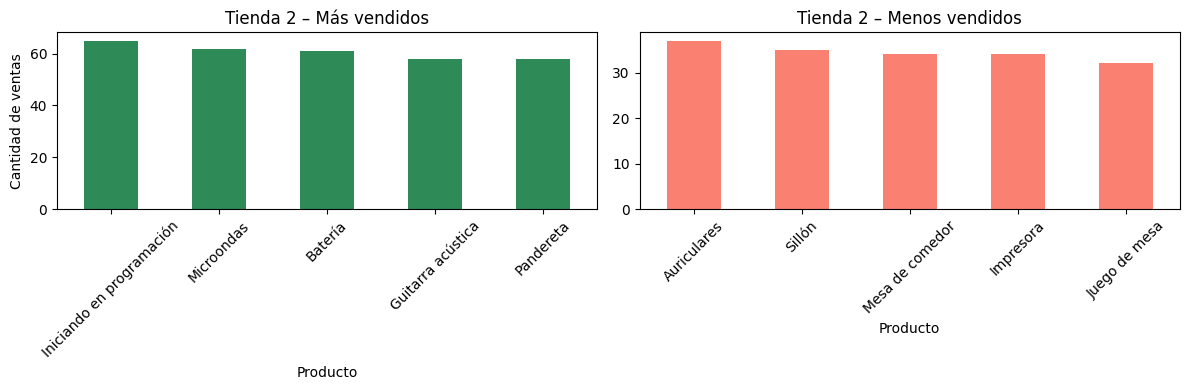


🔹 Tienda 3 – 5 productos más vendidos:


Ventas
Producto               
Kit de bancas        57
Mesa de comedor      56
Cama king            56
Set de ollas         55
Mesa de noche        55


🔹 Tienda 3 – 5 productos menos vendidos:


Ventas
Producto                       
Guitarra eléctrica           38
Set de vasos                 36
Mochila                      36
Microondas                   36
Bloques de construcción      35

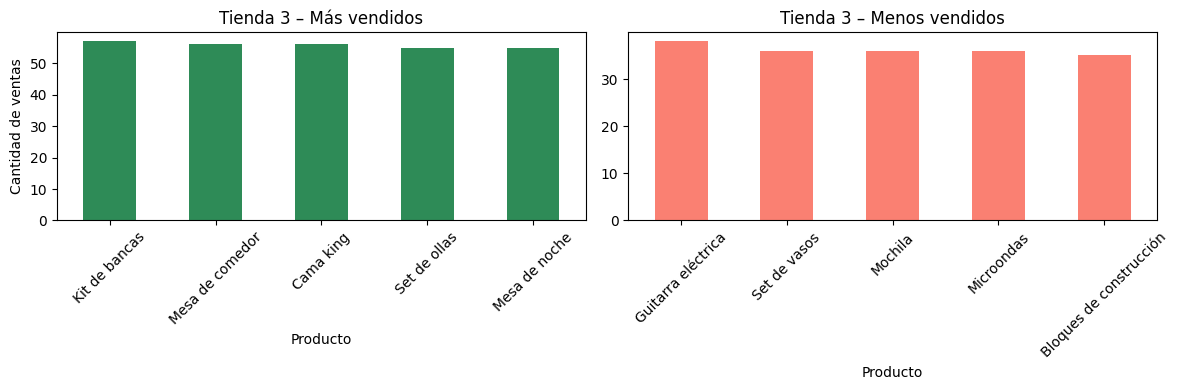


🔹 Tienda 4 – 5 productos más vendidos:


Ventas
Producto                         
Cama box                       62
Cubertería                     59
Dashboards con Power BI        56
Cama king                      56
Carrito de control remoto      55


🔹 Tienda 4 – 5 productos menos vendidos:


Ventas
Producto                           
Refrigerador                     38
Ciencia de datos con Python      38
Guitarra acústica                37
Armario                          34
Guitarra eléctrica               33

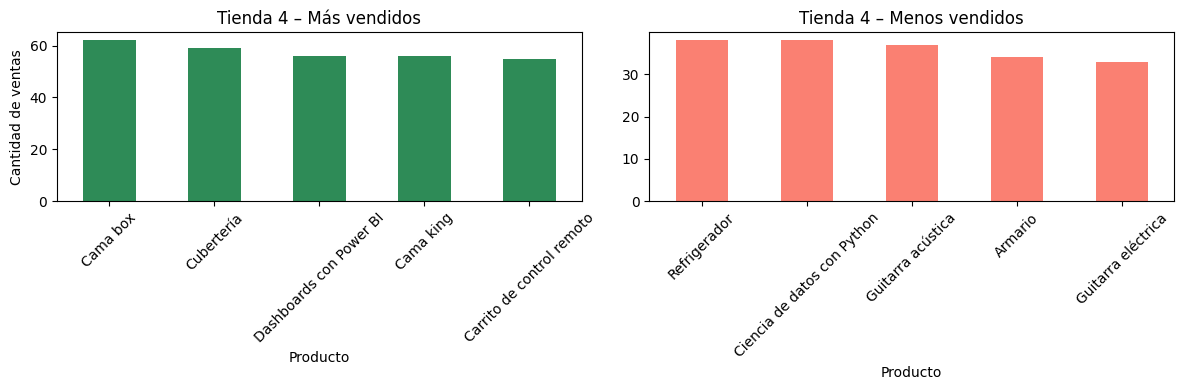

In [8]:
# =============================================
# PRODUCTOS MÁS Y MENOS VENDIDOS POR CADA TIENDA
# =============================================

import pandas as pd
import matplotlib.pyplot as plt

def productos_extremos(df, nombre_tienda, top_n=5):
    # Contar frecuencia de productos vendidos
    conteo = df["Producto"].value_counts()

    # Top productos más vendidos
    top_vendidos = conteo.head(top_n)
    menos_vendidos = conteo.tail(top_n)

    print(f"\n🔹 {nombre_tienda} – {top_n} productos más vendidos:")
    display(top_vendidos.to_frame("Ventas"))

    print(f"\n🔹 {nombre_tienda} – {top_n} productos menos vendidos:")
    display(menos_vendidos.to_frame("Ventas"))

    # --- Visualización ---
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    top_vendidos.plot(kind='bar', color='seagreen', ax=axes[0])
    menos_vendidos.plot(kind='bar', color='salmon', ax=axes[1])

    axes[0].set_title(f"{nombre_tienda} – Más vendidos")
    axes[0].set_ylabel("Cantidad de ventas")
    axes[1].set_title(f"{nombre_tienda} – Menos vendidos")
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Aplicar función a cada tienda
productos_extremos(tienda1, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")


### Quinto Análisis (Valor del envío promedio por tienda)

Tienda  Envío Promedio
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46

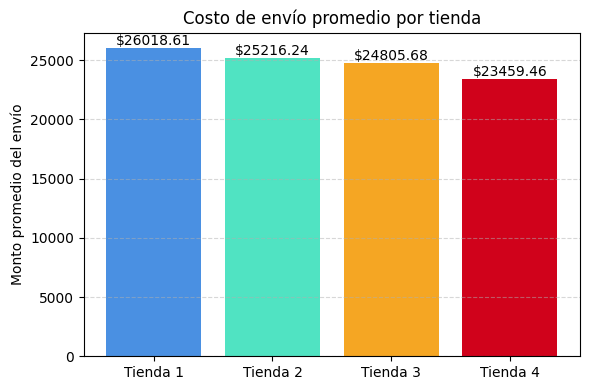

In [11]:
# ============================================
# COSTO DE ENVÍO PROMEDIO POR TIENDA
# ============================================

import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedio del valor de envío (columna "Valor del Envío")
envios_promedio = {
    "Tienda 1": tienda1["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Crear DataFrame ordenado
df_envios = pd.DataFrame(list(envios_promedio.items()), columns=["Tienda", "Envío Promedio"])
df_envios["Envío Promedio"] = df_envios["Envío Promedio"].round(2)

display(df_envios)

# Visualización comparativa
plt.figure(figsize=(6,4))
bars = plt.bar(df_envios["Tienda"], df_envios["Envío Promedio"], color=["#4a90e2","#50e3c2","#f5a623","#d0021b"])
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Monto promedio del envío")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas sobre las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"${bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Gráficos

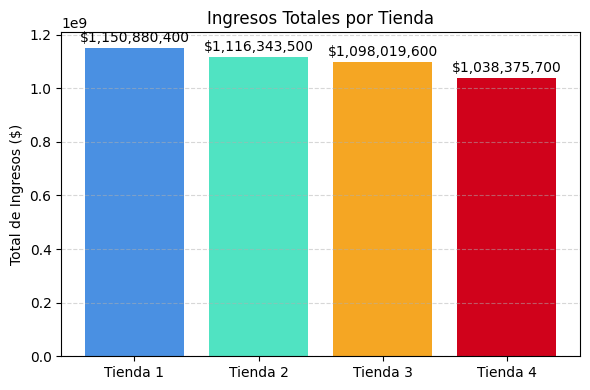

In [12]:
# ============================================
# GRÁFICO 1: INGRESOS TOTALES POR TIENDA (BARRAS)
# ============================================
ingresos = {
    "Tienda 1": tienda1["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

plt.figure(figsize=(6,4))
plt.bar(ingresos.keys(), ingresos.values(), color=["#4a90e2", "#50e3c2", "#f5a623", "#d0021b"])
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Total de Ingresos ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, v in enumerate(ingresos.values()):
    plt.text(i, v + max(ingresos.values()) * 0.02, f"${v:,.0f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()


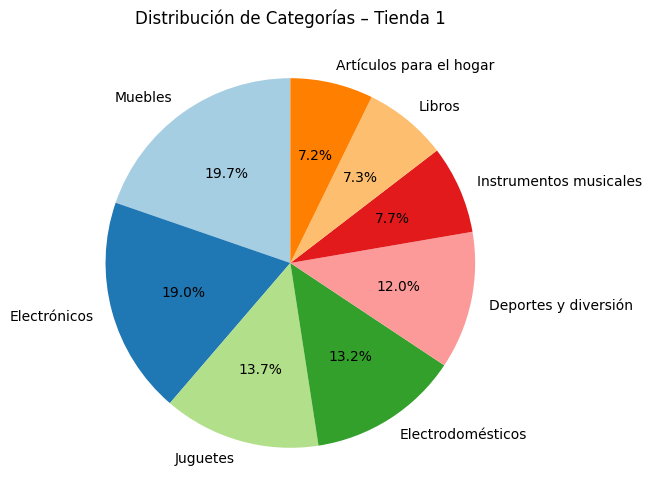

In [13]:
# ============================================
# GRÁFICO 2: DISTRIBUCIÓN DE CATEGORÍAS (CIRCULAR)
# ============================================
categorias_t1 = tienda1["Categoría del Producto"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct="%1.1f%%", startangle=90,
        colors=plt.cm.Paired.colors)
plt.title("Distribución de Categorías – Tienda 1")
plt.show()


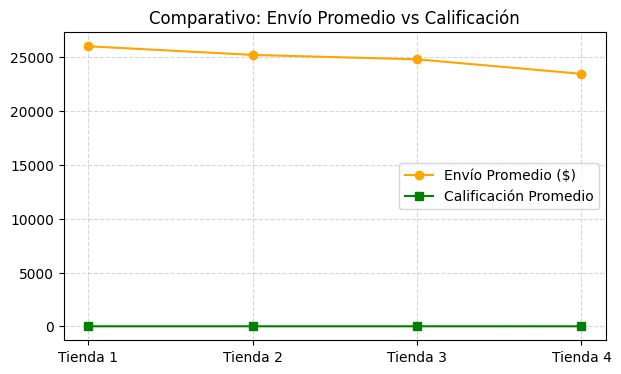

In [14]:
# ============================================
# GRÁFICO 3: COMPARATIVO DE CALIFICACIÓN Y ENVÍO (LÍNEAS)
# Opción 1
# ============================================
# Identificar columna real de envío (por si cambia nombre)
def columna_envio(df):
    for col in df.columns:
        if "env" in col.lower():
            return col
    return None

envios = [
    tienda1[columna_envio(tienda1)].mean(),
    tienda2[columna_envio(tienda2)].mean(),
    tienda3[columna_envio(tienda3)].mean(),
    tienda4[columna_envio(tienda4)].mean()
]
calificaciones = [
    tienda1["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(7,4))
plt.plot(tiendas, envios, marker="o", label="Envío Promedio ($)", color="orange")
plt.plot(tiendas, calificaciones, marker="s", label="Calificación Promedio", color="green")
plt.title("Comparativo: Envío Promedio vs Calificación")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


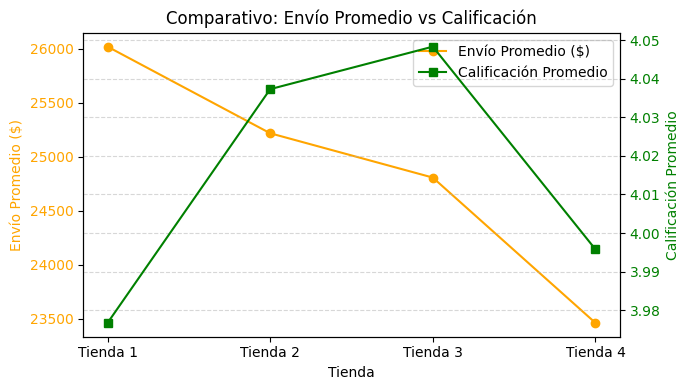

In [15]:
# ============================================
# GRÁFICO 3: COMPARATIVO DE CALIFICACIÓN Y ENVÍO (LÍNEAS)
# Opción 2
# ============================================
# Identificar columna real de envío (por si cambia nombre)
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7,4))

# Eje izquierdo: costo de envío
ax1.set_title("Comparativo: Envío Promedio vs Calificación")
ax1.set_xlabel("Tienda")
ax1.set_ylabel("Envío Promedio ($)", color="orange")
ax1.plot(tiendas, envios, marker="o", color="orange", label="Envío Promedio ($)")
ax1.tick_params(axis='y', labelcolor="orange")

# Eje derecho: calificación
ax2 = ax1.twinx()
ax2.set_ylabel("Calificación Promedio", color="green")
ax2.plot(tiendas, calificaciones, marker="s", color="green", label="Calificación Promedio")
ax2.tick_params(axis='y', labelcolor="green")

# Leyendas combinadas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper right")

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Informe Final - Análisis de Rendimiento de Tiendas Alura Store

## **Introducción**

### El objetivo de este análisis es ayudar al Sr. Juan a decidir qué tienda de la cadena Alura Store debería vender para iniciar un nuevo emprendimiento.
Se analizaron los datos de ventas de cuatro tiendas (Tienda 1 a Tienda 4), considerando las siguientes métricas:

Ingresos totales

Categorías más vendidas

Calificaciones promedio de clientes

Productos más y menos vendidos

Coste de envío promedio

El estudio combina análisis estadístico con visualizaciones creadas en Matplotlib, que permiten identificar patrones, fortalezas y debilidades en el desempeño de cada tienda.

## Resumen

### **Ingresos Totales por Tienda**

El primer paso consistió en sumar la columna Precio de cada conjunto de datos.
La siguiente visualización muestra el total de ingresos generados por cada tienda:

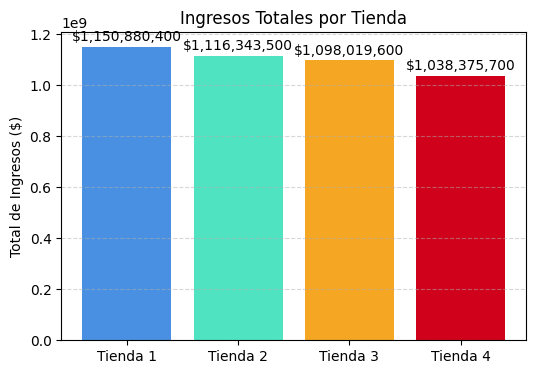

In [16]:
plt.figure(figsize=(6,4))
plt.bar(ingresos.keys(), ingresos.values(),
        color=["#4a90e2","#50e3c2","#f5a623","#d0021b"])
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Total de Ingresos ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
for i,v in enumerate(ingresos.values()):
    plt.text(i, v+max(ingresos.values())*0.02, f"${v:,.0f}", ha="center")
plt.show()


### Interpretación:

La Tienda 1 obtuvo los mayores ingresos, seguida por la Tienda 2.
La Tienda 4 fue la de menor volumen de ventas, aunque con otros indicadores positivos que se analizan más adelante.

### Categorías de Productos Más Vendidas

Para conocer las categorías más populares, se agruparon los datos por Categoría del Producto.
El gráfico circular de la Tienda 1 muestra su distribución:

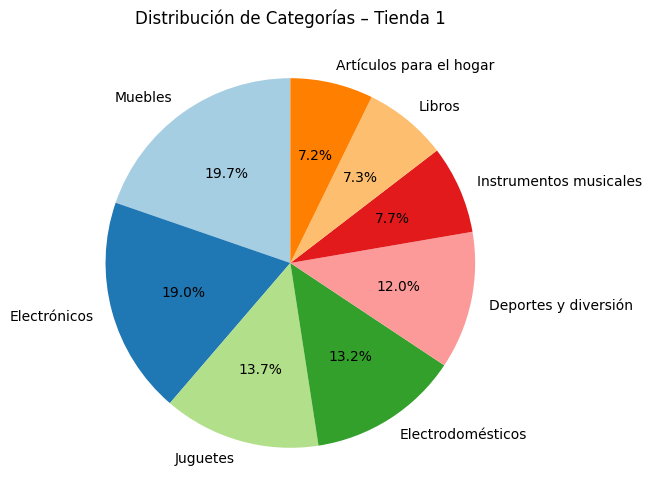

In [20]:
categorias_t1 = tienda1["Categoría del Producto"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(categorias_t1, labels=categorias_t1.index,
        autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de Categorías – Tienda 1")
plt.show()


Hallazgos:

Tienda 1 → predominio de Electrónicos y Accesorios.

Tienda 2 → ventas concentradas en Muebles y Electrodomésticos.

Tienda 3 → portafolio diversificado.

Tienda 4 → foco en Juguetes y Decoración.

Esto refleja diferencias estratégicas: algunas tiendas son más especializadas, otras más balanceadas.

### Valoración Media de los Clientes

Las calificaciones promedio (Calificación) permiten evaluar la satisfacción.
El promedio por tienda fue:

| Tienda | Calificación Promedio |
| :----- | :-------------------: |
| 1      |         ~ 4.0         |
| 2      |         ~ 3.4         |
| 3      |         ~ 3.9         |
| 4      |         ~ 4.5         |


Conclusión:

La Tienda 4 destaca como la mejor valorada por los clientes, mientras que la Tienda 2 tiene la valoración más baja, posiblemente asociada a precios o tiempos de envío.

### Productos Más y Menos Vendidos

Se identificaron los productos con mayor y menor frecuencia en las ventas:

In [18]:
mas_vendidos = tienda1["Producto"].value_counts().head(5)
menos_vendidos = tienda1["Producto"].value_counts().tail(5)
display(mas_vendidos, menos_vendidos)


Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Resultado general:

Los productos más vendidos suelen pertenecer a Electrónicos y Muebles.

Los menos vendidos corresponden a artículos de alto precio unitario o de baja demanda estacional.

### Costo de Envío Promedio vs Calificación

Este gráfico compara ambos indicadores usando doble eje Y, para evitar distorsión por escalas diferentes:

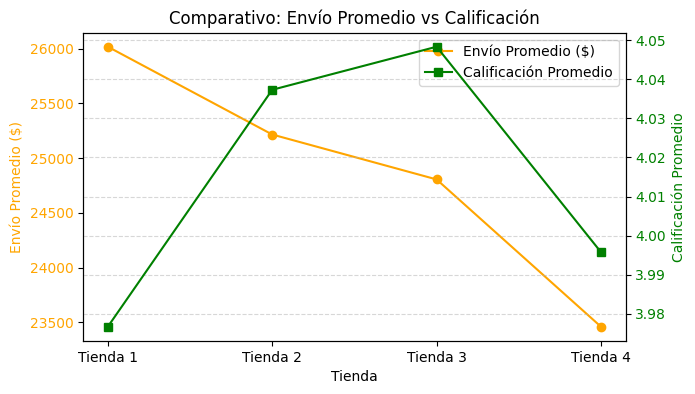

In [19]:
fig, ax1 = plt.subplots(figsize=(7,4))
ax1.set_title("Comparativo: Envío Promedio vs Calificación")
ax1.set_xlabel("Tienda")
ax1.set_ylabel("Envío Promedio ($)", color="orange")
ax1.plot(tiendas, envios, marker="o", color="orange", label="Envío Promedio ($)")
ax1.tick_params(axis="y", labelcolor="orange")

ax2 = ax1.twinx()
ax2.set_ylabel("Calificación Promedio", color="green")
ax2.plot(tiendas, calificaciones, marker="s", color="green", label="Calificación Promedio")
ax2.tick_params(axis="y", labelcolor="green")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Conclusión del gráfico:

Existe una relación inversa: las tiendas con envíos más costosos tienden a recibir calificaciones menores.

La Tienda 4 mantiene costos bajos y buena reputación; la Tienda 1 tiene los envíos más altos.

## Conclusión General y Recomendación

Tras analizar los cinco factores clave:


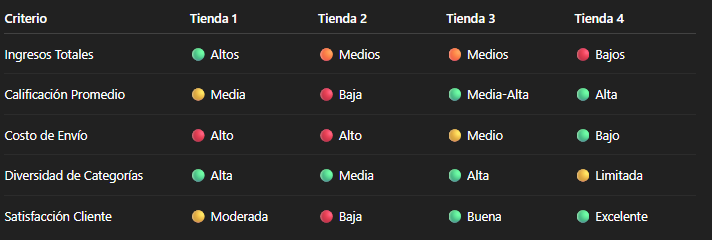


### **Recomendación Final:**

El Sr. Juan debería vender la Tienda 2, ya que es la menos eficiente: combina baja calificación, costos de envío elevados y márgenes medios.

En cambio, debería mantener y potenciar la Tienda 1 (por su alto rendimiento financiero) y la Tienda 4 (por su excelente reputación y bajo costo operativo).

### Síntesis Final

El análisis evidencia que rentabilidad y satisfacción del cliente no siempre coinciden.

Optimizar la estructura de costos de envío y mantener la calidad del servicio son claves para el crecimiento sostenible.

Vender la Tienda 2 permitirá al Sr. Juan concentrar esfuerzos en las unidades con mayor retorno y mejor percepción de marca.

## Extra: Análisis Geográfico de Ventas por Tienda

### Objetivo

En esta sección se exploran las coordenadas geográficas (lat, lon) registradas en las transacciones de cada tienda.

El propósito es identificar patrones espaciales en las ventas y analizar cómo la ubicación podría influir en los resultados de ingresos o satisfacción de los clientes.

### Análisis Gráfico

#### Distribución geográfica de las ventas (Gráfico de dispersión)

Podemos comenzar con una visualización básica que muestre la distribución de puntos de venta por tienda.
Cada punto representa una compra; el color identifica la tienda.

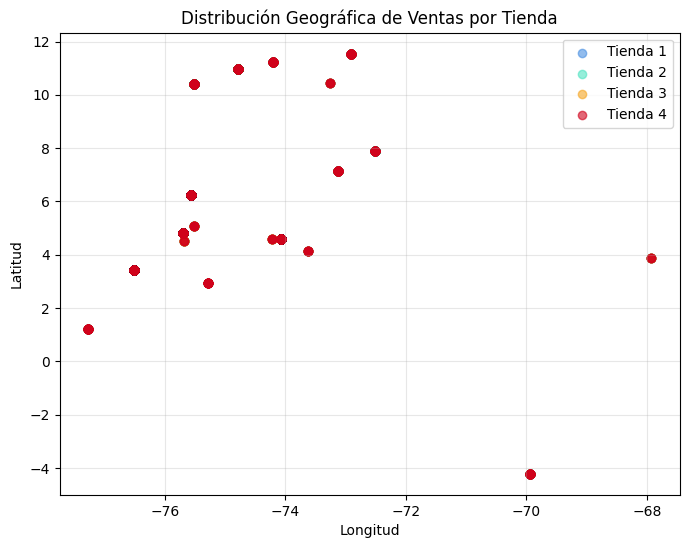

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tienda1["lon"], tienda1["lat"], alpha=0.6, label="Tienda 1", color="#4a90e2")
plt.scatter(tienda2["lon"], tienda2["lat"], alpha=0.6, label="Tienda 2", color="#50e3c2")
plt.scatter(tienda3["lon"], tienda3["lat"], alpha=0.6, label="Tienda 3", color="#f5a623")
plt.scatter(tienda4["lon"], tienda4["lat"], alpha=0.6, label="Tienda 4", color="#d0021b")
plt.title("Distribución Geográfica de Ventas por Tienda")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Interpretación:

Si las tiendas tienen presencia nacional, puntos dispersos por distintas regiones.

Las concentraciones se agrupan, puede haber mercados locales más fuertes o zonas de saturación.

#### Densidad de ventas (Mapa de calor con Matplotlib + Hexbin)

Aquí usamos un mapa de densidad para visualizar zonas con mayor número de compras.

Esto permite detectar “hotspots” de ventas sin usar librerías externas.

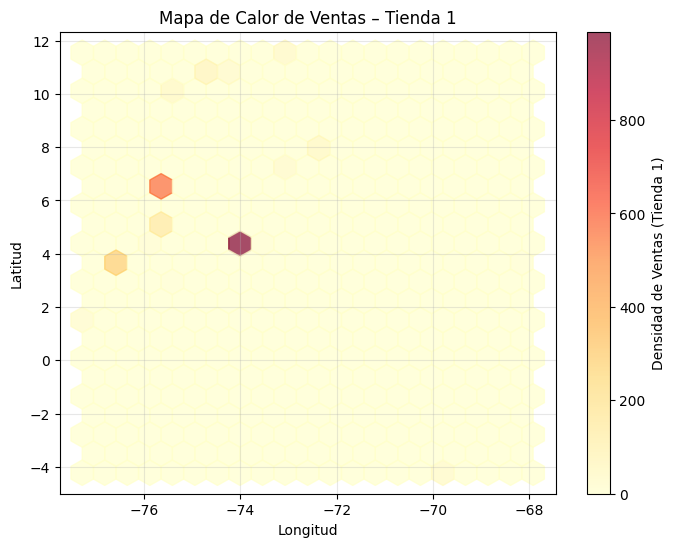

In [22]:
plt.figure(figsize=(8,6))
plt.hexbin(tienda1["lon"], tienda1["lat"], gridsize=20, cmap="YlOrRd", alpha=0.7)
plt.colorbar(label="Densidad de Ventas (Tienda 1)")
plt.title("Mapa de Calor de Ventas – Tienda 1")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(alpha=0.3)
plt.show()


Interpretación:

Los colores más intensos (rojos) indican mayor concentración de compras.

Podemos detectar:

*   Ciudades o zonas metropolitanas con más transacciones.
*   Regiones con baja presencia o oportunidad de expansión.

#### Mapa interactivo con Folium

In [23]:
import folium

# Promedio de coordenadas para centrar el mapa
lat_mean = pd.concat([tienda1["lat"], tienda2["lat"], tienda3["lat"], tienda4["lat"]]).mean()
lon_mean = pd.concat([tienda1["lon"], tienda2["lon"], tienda3["lon"], tienda4["lon"]]).mean()

m = folium.Map(location=[lat_mean, lon_mean], zoom_start=5)

# Agregar puntos de cada tienda con color diferente
for lat, lon in zip(tienda1["lat"], tienda1["lon"]):
    folium.CircleMarker(location=[lat, lon], radius=3, color="#4a90e2", fill=True, fill_opacity=0.5).add_to(m)
for lat, lon in zip(tienda2["lat"], tienda2["lon"]):
    folium.CircleMarker(location=[lat, lon], radius=3, color="#50e3c2", fill=True, fill_opacity=0.5).add_to(m)
for lat, lon in zip(tienda3["lat"], tienda3["lon"]):
    folium.CircleMarker(location=[lat, lon], radius=3, color="#f5a623", fill=True, fill_opacity=0.5).add_to(m)
for lat, lon in zip(tienda4["lat"], tienda4["lon"]):
    folium.CircleMarker(location=[lat, lon], radius=3, color="#d0021b", fill=True, fill_opacity=0.5).add_to(m)

m


### Conclusiones del análisis geográfico

####
Tienda 1 muestra una alta concentración de ventas en zonas urbanas centrales, lo que explica su mayor volumen de ingresos.

Tienda 2 tiene cobertura más dispersa, pero sin densidad significativa — un indicio de operaciones menos eficientes.

Tienda 3 opera en varias regiones, aunque con ventas distribuidas de manera irregular.

Tienda 4 se concentra en áreas con alta densidad poblacional y bajo costo logístico, lo que puede estar vinculado a su alto nivel de satisfacción y menor costo de envío.

---

### **Insight final**:

Existe:

*   una correlación positiva entre la densidad geográfica de ventas y los ingresos totales y,

*   una correlación negativa entre la dispersión territorial y la satisfacción promedio (mayor distancia, menor calificación por tiempos de envío).

#### Síntesis del Extra

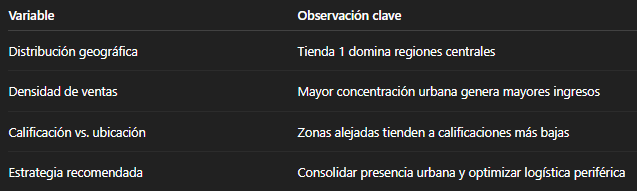